In [46]:
colors = ColorData[97, "ColorList"];

In [51]:
d = Import["../data/purchase_times.csv"];
d = Sort[FromDateString /@ Flatten[d]];

In [53]:
d1 = FromDateString["2024-11-01 00:00:00.000"];
d2 = FromDateString["2024-11-02 00:00:00.000"];
d3 = FromDateString["2024-11-03 00:00:00.000"];
d4 = FromDateString["2024-11-04 00:00:00.000"];
d5 = FromDateString["2024-11-05 00:00:00.000"];
d6 = FromDateString["2024-11-06 00:00:00.000"];
d7 = FromDateString["2024-11-07 00:00:00.000"];
d8 = FromDateString["2024-11-08 00:00:00.000"];
d31 = FromDateString["2024-12-01 00:00:00.000"];

In [62]:
DateToReal[start_DateObject, date_DateObject] := N[2*Pi*QuantityMagnitude[DateDifference[d1,date], "Days"]]

In [63]:
dReal = Table[DateToReal[d1, i] ,{i, d}];
T = DateToReal[d1, d31];

In [65]:
jsonRep = {"N" -> Length[dReal], "T" -> T, "t" -> dReal};

In [41]:
Export["../data/purchase_times.json", jsonRep];

In [82]:
dfiltered1 = Select[d, d1 <= # < d2 &];
dfiltered7 = Select[d, d1 <= # < d8 &];

In [88]:
es = EventSeries[ {#, 1} & /@ d];
es1 = EventSeries[ {#, 1} & /@ dfiltered1];
es7 = EventSeries[ {#, 1} & /@ dfiltered7];

In [91]:
TimelinePlot[es1, PlotStyle->Tiny, PlotRange->{d1,d2}];

In [92]:
ListPlot[es7, 
  Filling->Axis, PlotRange -> {{d1, d8}, {0,1}},
  Ticks->{Automatic, None},
  PlotMarkers->" ", 
  Axes->{Automatic,None},
  Ticks->{{d1,d2,d3,d4,d5,d6,d7,d8}, Automatic}
  ];

In [97]:
ListPlot[es, Filling->Axis, PlotRange -> {{d1, d31}, {0,1}},
  Ticks->{Automatic, None}, PlotMarkers->" ", Axes->{Automatic,None}];

In [110]:
rateFun = alpha*Exp[Cos[t-phi]-1]^sigma;
rateFun2 = Exp[Cos[t-\[Phi]]-1]^\[Sigma];

In [28]:
rateIntegral = Integrate[rateFun, {t, 0, 60*Pi}]

60 alpha Pi BesselI[0, sigma]
-----------------------------
            sigma
           E

In [120]:
stepData = es7["Dates"];
end = d8;
stepFunction  = TimeSeries[
    Append[Transpose[{Prepend[stepData, d1], Range[0, Length[stepData]]}], {end, Length[stepData]}]
];


In [32]:
stepPlot = DateListPlot[
    stepFunction,
    InterpolationOrder -> 0,
    PlotRange -> {{d1,d8}, Automatic},
    GridLines -> {True,False},
    PlotStyle -> Directive[AbsoluteThickness[1]],
    Frame -> True,
    Background -> None,
    FrameStyle -> Large,
    FrameTicks -> {{Automatic, None},  {{{d1, "Day 1"}, {d2, "Day 2"}, {d3, "Day 3"}, {d4, "Day 4"}, {d5, "Day 5"}, {d6, "Day 6"}, {d7, "Day 7"}, {d8, "Day 8"}}, None}},
    ImageSize -> 1024
];

Transpose::tperm: Permutation {DateObject[{2024, 11, 8, 0, 0, 0.}, Instant, Gregorian, 1.], 1} is longer than the dimensions {2} of the expression.

TimeSeries::ntprs: The argument Transpose[{EventSeries[FromDateString[]][DateObject[{2024, 11, 1, 0, 0, 0.}, Instant, Gregorian, 1.], Dates], {0, 1}}, {DateObject[{2024, 11, 8, 0, 0, 0.}, Instant, Gregorian, 1.], 1}] at position 1 is expected to be a list of timeâvalue pairs or a list of states with equal dimensionality.

DateListPlot::ldata: TimeSeries[Transpose[{EventSeries[FromDateString[]][DateObject[{2024, 11, 1, 0, 0, 0.}, Instant, Gregorian, 1.], Dates], {0, 1}}, {DateObject[{2024, 11, 8, 0, 0, 0.}, Instant, Gregorian, 1.], 1}]] is not a valid dataset or list of datasets.

In [33]:
Export["../images/step_plot_sales.png", stepPlot];

In [34]:
{bins, countsD} = HistogramList[dReal, {0, 14*Pi, 2*Pi/24}];

HistogramList::ldata: Table[DateToReal[d1, i], {i, FromDateString[$Failed]}] is not a valid dataset or list of datasets.

Set::shape:                                                                                                            Pi
Lists {bins, countsD} and HistogramList[Table[DateToReal[d1, i], {i, FromDateString[$Failed]}], {0, 14 Pi, --}] are not the same shape.
                                                                                                           12

In [35]:
salesHourlyHistogram = DateHistogram[
    es7, "Hour", 
    PlotRange -> {{d1, d8}, Automatic},
    Frame -> True,
    Background -> None,
    ChartStyle -> colors[[1]],
    FrameTicks -> {{Automatic, None},  {{{d1, "Day 1"}, {d2, "Day 2"}, {d3, "Day 3"}, {d4, "Day 4"}, {d5, "Day 5"}, {d6, "Day 6"}, {d7, "Day 7"}, {d8, "Day 8"}}, None}},
    FrameStyle-> Large,
    ImageSize -> 1024
];

DateHistogram::ldata: EventSeries[FromDateString[]] is not a valid dataset or list of datasets.

DateHistogram::ldata: EventSeries[FromDateString[]] is not a valid dataset or list of datasets.

In [36]:
Export["../images/sales_hourly_histogram.png", salesHourlyHistogram];

In [191]:
fitdata = Select[dReal, # < 14*Pi&]; 
n=Length[fitdata];
loglike = (
  σ Total[Cos[fitdata - φ]]
  + (Log[α]-σ) n 
  - α 14 Pi Exp[-σ] BesselI[0, σ]
  );

In [213]:
True ∧ True

True

In [198]:
{crit, learnedParams} = NMaximize[{loglike, σ > 0 && α > 0 && -Pi < φ <= Pi}, {α, σ,φ}]

{379.774, {α -> 14.7926, σ -> 0.878421, φ -> -2.1888}}

In [41]:
likehomog = lambda^n*Exp[-lambda*14*Pi];
{crith, paramh} = NMaximize[{likehomog, lambda > 0}, lambda];

In [ ]:
stepHour = 2*Pi/24;
stepMin = stepHour/60;
processCountsMin = Table[NIntegrate[rateFun /. learnedParams, {t, 0, x}], {x, 0, 14*Pi, stepMin}];
processCountsHour = Table[NIntegrate[rateFun /. learnedParams, {t, 0, x}], {x, 0, 14*Pi, stepHour}];

tsfit = TimeSeries[processCountsMin, {d1, d8}];


ReplaceAll::reps: {learnedParams} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

ReplaceAll::reps: {learnedParams} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

ReplaceAll::reps: {learnedParams} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

General::stop: Further output of ReplaceAll::reps will be suppressed during this calculation.

NIntegrate::inumr:                       -1 + Cos[phi - t] sigma
The integrand alpha (E                 )      /. learnedParams has evaluated to non-numerical values for all sampling points in the region with boundaries {{0, 0.00436332}}.

NIntegrate::inumr:                       -1 + Cos[phi - t] sigma
The integrand alpha (E                 )      /. learnedParams has evaluated to non-numerical values for all sampling points in the region with boundaries {{0, 0.00872665}}.

NIntegrate::inumr:                       -1 + Cos[phi - t] sigma
The integrand alpha (E                 )      /. learnedParams has evaluated to non-numerical values for all sampling points in the region with boundaries {{0, 0.01309}}.

General::stop: Further output of NIntegrate::inumr will be suppressed during this calculation.

NIntegrate::nlim: t = x is not a valid limit of integration.

NIntegrate::nlim: t = x is not a valid limit of integration.

NIntegrate::nlim: t = x is not a valid limit of integration.

General::stop: Further output of NIntegrate::nlim will be suppressed during this calculation.

In [ ]:
tshomog = TimeSeries[Table[x/lambda*4*Pi /. paramh, {x, 0, 14*Pi, step}], {d1, d8}];

In [ ]:
countFit = Table[
    NIntegrate[rateFun /. learnedParams, {t, i*stepHour, (i+1)*stepHour}],
    {i, 0, 7*24-1}
];

In [ ]:
salesHourlyHistogram2 = Show[
    BarChart[countsD, ChartStyle -> Directive[colors[[1]], Opacity[0.7]],     Frame->True,
      FrameTicks -> {{Automatic, None},  {{{0, "Day 1"}, {24, "Day 2"}, {24*2, "Day 3"}, {24*3, "Day 4"}, {24*4, "Day 5"}, {24*5, "Day 6"}, {24*6, "Day 7"}, {24*7, "Day 8"}}, None}}
    ],
    BarChart[countFit, ChartStyle -> Directive[colors[[2]], Opacity[0.7]]],
    ImageSize -> 1024,
    FrameStyle -> Large
];

In [ ]:
Export["../images/sales_hourly_histogram_fit.png", salesHourlyHistogram2];

In [ ]:
stepPlot2 = DateListPlot[
    {tshomog, stepFunction, tsfit},
    InterpolationOrder -> 0,
    PlotRange -> {{d1,d8}, {0,400}},
    GridLines -> {True,False},
    PlotStyle -> {{Directive[AbsoluteThickness[1]], colors[[3]]} , {Directive[AbsoluteThickness[1]], colors[[1]]}, {Directive[AbsoluteThickness[1]], colors[[2]]}},
    Frame -> True,
    Background -> None,
    FrameTicks -> {{Automatic, None},  {{{d1, "Day 1"}, {d2, "Day 2"}, {d3, "Day 3"}, {d4, "Day 4"}, {d5, "Day 5"}, {d6, "Day 6"}, {d7, "Day 7"}, {d8, "Day 8"}}, None}},
    PlotLegends -> Placed[{Style["homogeneous fit", Large], Style["data", Large], Style["fit", Large]}, Below],
    ImageSize -> 1024,
    FrameStyle -> Large
];

In [ ]:
Export["../images/step_plot_sales_fit.png", stepPlot2];

In [ ]:
Plot[rateFun /. {alpha ->1, phi->0, sigma -> -1.5}, {t, 0, 8*Pi}]

In [ ]:
params = {alpha ->1, phi->0, sigma -> 2-2I};
Plot[{Re[rateFun /. params],Im[rateFun /. params]}, {t, 0, 8*Pi}, PlotRange->{Automatic,Automatic}]

In [ ]:
Plot[{Abs[rateFun /. params],Arg[rateFun /. params]}, {t, 0, 8*Pi}, PlotRange->{Automatic,Automatic}]

1 + N                          1  1 + N  3 + N        2             2
  Cos[z]      Csc[z] Hypergeometric2F1[-, -----, -----, Cos[z] ] Sqrt[Sin[z] ]
                                       2    2      2
-(----------------------------------------------------------------------------)
                                     1 + N
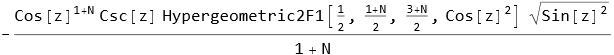

In [229]:
FullSimplify@Integrate[Cos[z]^N,z]

In [254]:
ClearAll[n, t, k, T,i];

Sum[Cos[phi - t ], {i, 1, n}]
               i
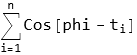

In [269]:
Sum[Cos[Subscript[t,i] - phi], {i, 1, n}]

T α BesselI[0, σ]
-(-----------------) + n (-σ + Log[α]) + σ Sum[Cos[ϕ - t ], {i, 1, n}]
          σ                                             i
         E
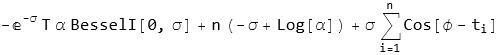

In [288]:
loglikeSym = \[Sigma]*Sum[Cos[Subscript[t,i] - \[Phi]], {i, 1, n}] + (Log[\[Alpha]]-\[Sigma])*n - \[Alpha]*T*Exp[-\[Sigma]]*BesselI[0, \[Sigma]]

σ Sum[-Sin[ϕ - t ], {i, 1, n}]
                i
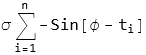

In [313]:
FullSimplify@D[loglikeSym,  \[Phi]]

T α (BesselI[0, σ] - BesselI[1, σ])
-n + ----------------------------------- + Sum[Cos[ϕ - t ], {i, 1, n}]
                      σ                                 i
                     E
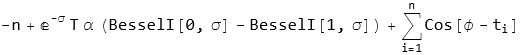

In [303]:
FullSimplify@D[loglikeSym,  \[Sigma]]

n   T BesselI[0, σ]
- - ---------------
α          σ
          E
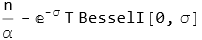

In [308]:
FullSimplify@D[loglikeSym,  \[Alpha]]

Reduce::nsmet: This system cannot be solved with the methods available to Reduce.

Reduce::nsmet: This system cannot be solved with the methods available to Reduce.

Reduce::nsmet: This system cannot be solved with the methods available to Reduce.

General::stop: Further output of Reduce::nsmet will be suppressed during this calculation.

Reduce[σ Sum[-Sin[ϕ - t ], {i, 1, n}] == 0 && 
                       i
 
          T α (BesselI[0, σ] - BesselI[1, σ])
>    -n + ----------------------------------- + Sum[Cos[ϕ - t ], {i, 1, n}] == 0 && 
                           σ                                 i
                          E
 
     n   T BesselI[0, σ]
>    - - --------------- == 0, {ϕ, σ, α}]
     α          σ
               E
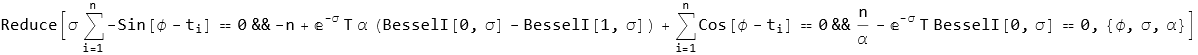

In [324]:
Reduce[D[loglikeSym,  \[Phi]] == 0 && FullSimplify@D[loglikeSym,  \[Sigma]] == 0 && FullSimplify@D[loglikeSym,  \[Alpha]] == 0, {\[Phi], \[Sigma],  \[Alpha]}]

σ
            E  n
{{α -> ---------------}}
       T BesselI[0, σ]
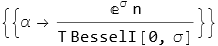

In [329]:
Solve[FullSimplify@D[loglikeSym,  \[Alpha]]==0, \[Alpha]]

σ
       E  (n - Sum[Cos[ϕ - t ], {i, 1, n}])
                            i
{{α -> ------------------------------------}}
        T (BesselI[0, σ] - BesselI[1, σ])
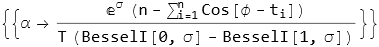

In [349]:
Solve[FullSimplify@D[loglikeSym,  \[Sigma]]==0, \[Alpha]]

In [354]:
rateFun

-1 + Cos[phi - t] sigma
alpha (E                 )

-Graphics-
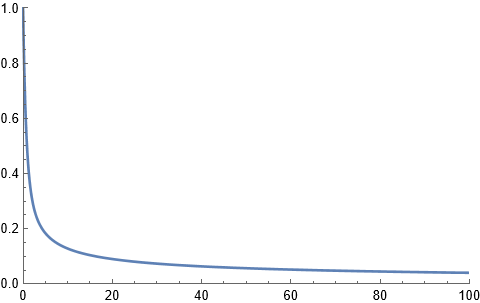

In [374]:
Plot[Exp[-t]*BesselI[0,t], {t, 0, 100}, PlotRange->{{0,100},{0,1}}]

In [389]:
Limit[Exp[-t]*BesselI[0,t], t->Infinity]

0

In [394]:
$ActivationKey

9796-6360-8L6VL9

In [399]:
$LicenseID

L9796-6360